# **Import Libraries**


In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn.tree import  export_graphviz
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.metrics import mean_squared_error



Dataset 1- Pima Indian dataset

In [2]:
Pima_dataset = pd.read_csv('/Users/siddartha/Desktop/github/programming-for-ML-assignments/Project/diabetes.csv')

In [3]:
Pima_dataset.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


Before Dropping the Null values

In [4]:
Pima_dataset.shape

(768, 9)

Find  the details of all the **Attributes**

In [5]:
Pima_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
Pima_dataset.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
print("number of rows with glucose value 0 is: {0}".format(len(Pima_dataset.loc[Pima_dataset['Glucose'] == 0])))
print("number of rows with missing BloodPressure 0 is: {0}".format(len(Pima_dataset.loc[Pima_dataset['BloodPressure'] == 0])))
print("number of rows with missing skin thikness 0 is: {0}".format(len(Pima_dataset.loc[Pima_dataset['SkinThickness'] == 0])))
print("number of rows with Insulin 0 is: {0}".format(len(Pima_dataset.loc[Pima_dataset['Insulin'] == 0])))
print("number of rows with BMI 0 is: {0}".format(len(Pima_dataset.loc[Pima_dataset['BMI'] == 0])))
print("number of rows with DiabetesPedigreeFunction 0 is: {0}".format(len(Pima_dataset.loc[Pima_dataset['DiabetesPedigreeFunction'] == 0])))
print("number of rows with age 0 is: {0}".format(len(Pima_dataset.loc[Pima_dataset['Age'] == 0])))


number of rows with glucose value 0 is: 5
number of rows with missing BloodPressure 0 is: 35
number of rows with missing skin thikness 0 is: 227
number of rows with Insulin 0 is: 374
number of rows with BMI 0 is: 11
number of rows with DiabetesPedigreeFunction 0 is: 0
number of rows with age 0 is: 0


In [8]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent', missing_values=0)
imputer = imputer.fit(Pima_dataset[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']])
Pima_dataset[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = imputer.transform(Pima_dataset[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']])


In [9]:
print("number of rows with glucose value 0 is: {0}".format(len(Pima_dataset.loc[Pima_dataset['Glucose'] == 0])))
print("number of rows with missing BloodPressure 0 is: {0}".format(len(Pima_dataset.loc[Pima_dataset['BloodPressure'] == 0])))
print("number of rows with missing skin thikness 0 is: {0}".format(len(Pima_dataset.loc[Pima_dataset['SkinThickness'] == 0])))
print("number of rows with Insulin 0 is: {0}".format(len(Pima_dataset.loc[Pima_dataset['Insulin'] == 0])))
print("number of rows with BMI 0 is: {0}".format(len(Pima_dataset.loc[Pima_dataset['BMI'] == 0])))
print("number of rows with DiabetesPedigreeFunction 0 is: {0}".format(len(Pima_dataset.loc[Pima_dataset['DiabetesPedigreeFunction'] == 0])))
print("number of rows with age 0 is: {0}".format(len(Pima_dataset.loc[Pima_dataset['Age'] == 0])))


number of rows with glucose value 0 is: 0
number of rows with missing BloodPressure 0 is: 0
number of rows with missing skin thikness 0 is: 0
number of rows with Insulin 0 is: 0
number of rows with BMI 0 is: 0
number of rows with DiabetesPedigreeFunction 0 is: 0
number of rows with age 0 is: 0


In [10]:
Pima_dataset.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,105.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,105.0,26.6,0.351,31,0
2,8,183.0,64.0,32.0,105.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,32.0,105.0,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,70.0,32.0,105.0,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,32.0,105.0,32.0,0.232,54,1


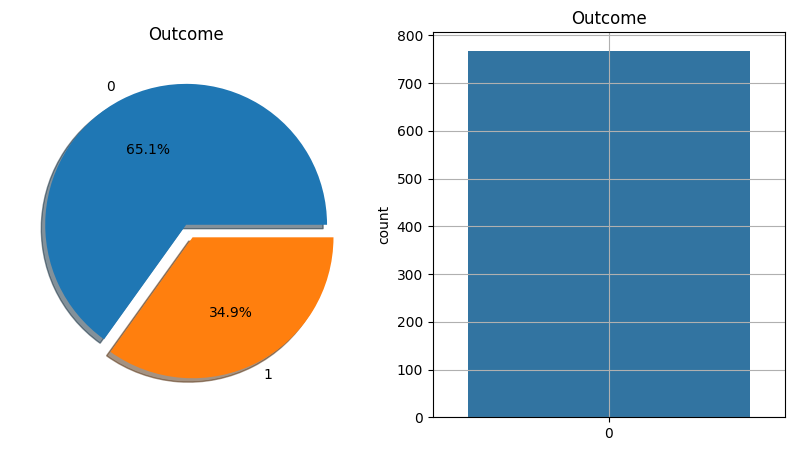

In [11]:
# outcome
f,ax = plt.subplots(1,2, figsize=(10,5))
Pima_dataset['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%', ax=ax[0],shadow=True)
ax[0].set_title('Outcome')
ax[0].set_ylabel('')
sns.countplot(Pima_dataset['Outcome'], ax=ax[1])
ax[1].set_title('Outcome')
N,P = Pima_dataset['Outcome'].value_counts()

plt.grid()
plt.show()

In [12]:
Pima_dataset['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

# **Split the Data (Train Test Split)**

In [13]:
X = Pima_dataset.drop(columns='Outcome', axis=1)
Y = Pima_dataset['Outcome']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

In [15]:
# URL: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html
# Estimate mutual information for a discrete target variable.
# Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. 
# It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.
from sklearn.feature_selection import mutual_info_classif

mutual_info = mutual_info_classif(X_train, y_train, random_state = 0)
mutual_info


array([0.01555395, 0.11358017, 0.02420075, 0.00523363, 0.0200378 ,
       0.07666446, 0.        , 0.04601336])

In [16]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending = False)

Glucose                     0.113580
BMI                         0.076664
Age                         0.046013
BloodPressure               0.024201
Insulin                     0.020038
Pregnancies                 0.015554
SkinThickness               0.005234
DiabetesPedigreeFunction    0.000000
dtype: float64

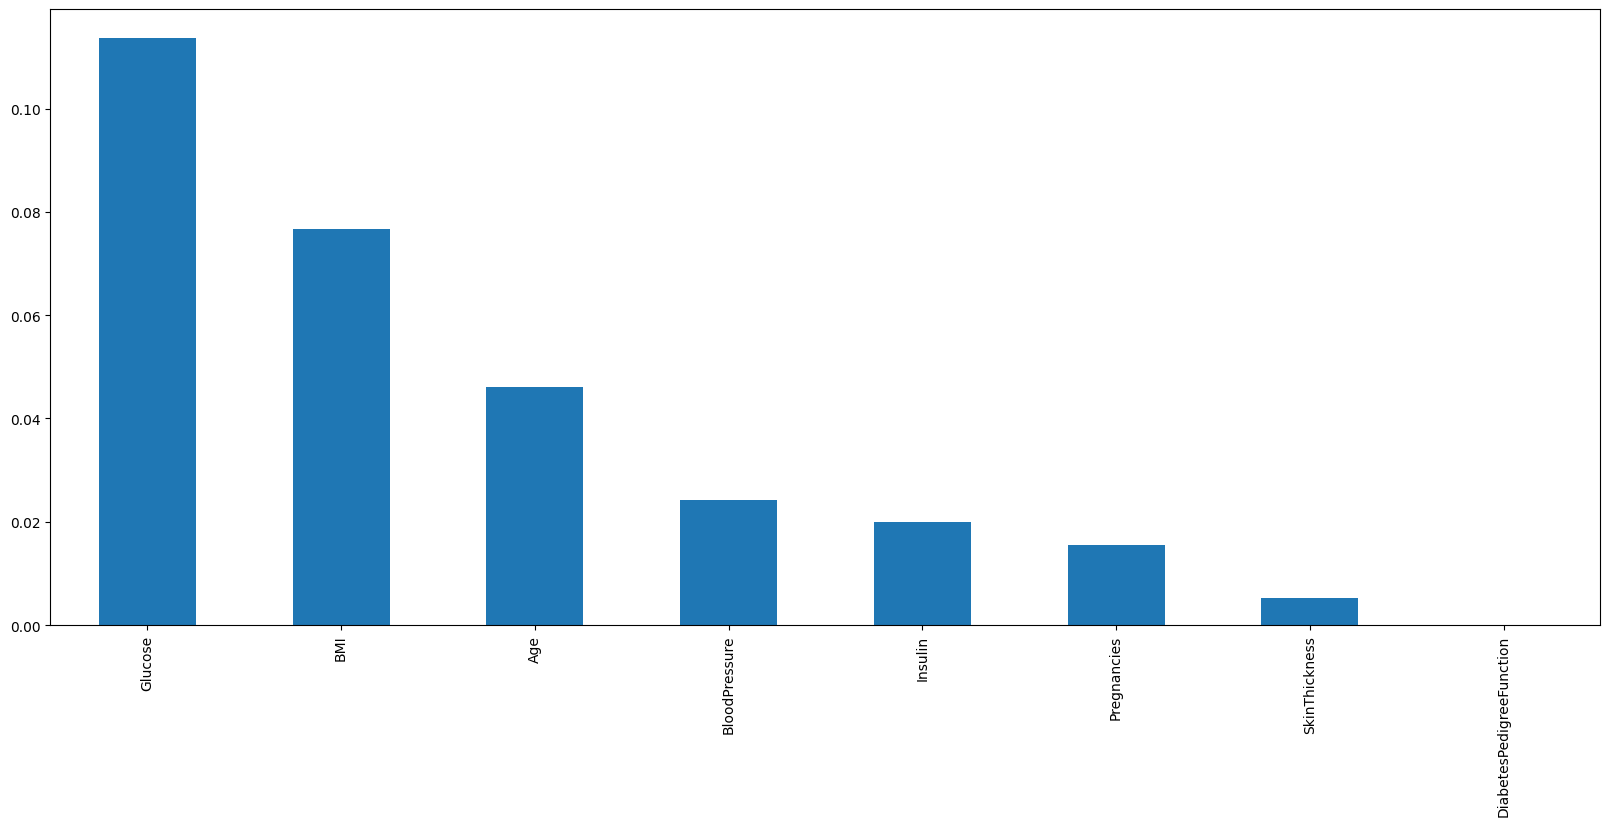

In [17]:
plt.figure(figsize = (20, 8))
mutual_info.sort_values(ascending = False).plot.bar();

In [18]:
#So we decided to drp the DiabetesPedigreeFunction column
Pima_dataset.drop(columns='DiabetesPedigreeFunction',axis=1, inplace=True)

In [19]:
Pima_dataset.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
0,6,148.0,72.0,35.0,105.0,33.6,50,1
1,1,85.0,66.0,29.0,105.0,26.6,31,0
2,8,183.0,64.0,32.0,105.0,23.3,32,1
3,1,89.0,66.0,23.0,94.0,28.1,21,0
4,0,137.0,40.0,35.0,168.0,43.1,33,1
5,5,116.0,74.0,32.0,105.0,25.6,30,0
6,3,78.0,50.0,32.0,88.0,31.0,26,1
7,10,115.0,70.0,32.0,105.0,35.3,29,0
8,2,197.0,70.0,45.0,543.0,30.5,53,1
9,8,125.0,96.0,32.0,105.0,32.0,54,1


In [20]:
X = Pima_dataset.drop(columns='Outcome', axis=1)
Y = Pima_dataset['Outcome']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0, stratify =Y )

In [22]:
print(X.shape, X_train.shape,y_train.shape, X_test.shape)

(768, 7) (614, 7) (614,) (154, 7)


# **ADSYN Implementation**

In [23]:
from imblearn.over_sampling import ADASYN
from collections import Counter

counter  = Counter(y_train)
print('Before',counter)
ada = ADASYN(random_state=0,sampling_strategy='minority')

X_smote, y_smote = ada.fit_resample(X_train, y_train)

counter = Counter(y_smote);
print('After',counter)


Before Counter({0: 400, 1: 214})
After Counter({0: 400, 1: 380})


In [24]:

# Befor smote
y_train.value_counts()

Outcome
0    400
1    214
Name: count, dtype: int64

In [25]:

# after smote

y_smote.value_counts()

Outcome
0    400
1    380
Name: count, dtype: int64

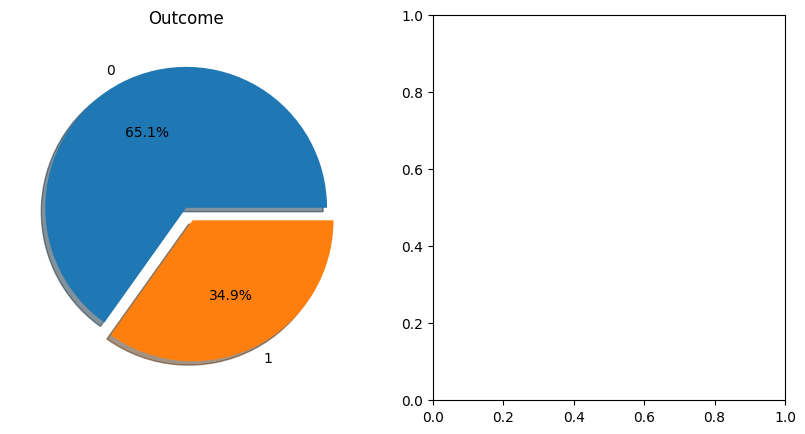

In [26]:
# outcome before smote
f,ax = plt.subplots(1,2, figsize=(10,5))
y_train.value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%', ax=ax[0],shadow=True)
ax[0].set_title('Outcome')
ax[0].set_ylabel('')



plt.show()

**# After smote**

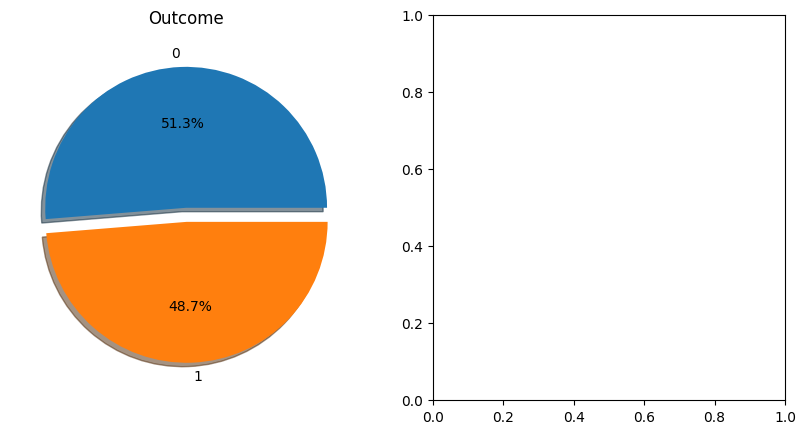

In [27]:
# outcome
f,ax = plt.subplots(1,2, figsize=(10,5))
y_smote.value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%', ax=ax[0],shadow=True)
ax[0].set_title('Outcome')
ax[0].set_ylabel('')



plt.show()

In [28]:

# Befor smote
y_train.value_counts()

Outcome
0    400
1    214
Name: count, dtype: int64

In [29]:
# after smote

y_smote.value_counts()

Outcome
0    400
1    380
Name: count, dtype: int64


# **Random Forest**

In [36]:
###The hyperparameter we got from grid search
rf=RandomForestClassifier(max_depth=780, max_features='log2', n_estimators=600)
### fit the randomized model
rf.fit(X_smote, y_smote)


RandomForestClassifier(max_depth=780, max_features='log2', n_estimators=600)

In [37]:
from sklearn.metrics import accuracy_score
y_pred=rf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print(classification_report(y_test, y_pred))

[[84 16]
 [13 41]]
Accuracy Score 0.8116883116883117
              precision    recall  f1-score   support

           0       0.87      0.84      0.85       100
           1       0.72      0.76      0.74        54

    accuracy                           0.81       154
   macro avg       0.79      0.80      0.80       154
weighted avg       0.81      0.81      0.81       154



# **XG Boost**

In [32]:
###The hyperparameter we got from grid search
from xgboost import XGBClassifier
xgbc = XGBClassifier(colsample_bytree = 0.8,
 gamma= 1,
 max_depth= 3,
 min_child_weight= 1,
 subsample= 0.8,
 objective= 'binary:logistic',
 nthread= -1,
 scale_pos_weight=1).fit(X_smote, y_smote)

In [33]:
from sklearn.metrics import accuracy_score
y_pred=xgbc.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print(classification_report(y_test, y_pred))

[[79 21]
 [14 40]]
Accuracy Score 0.7727272727272727
              precision    recall  f1-score   support

           0       0.85      0.79      0.82       100
           1       0.66      0.74      0.70        54

    accuracy                           0.77       154
   macro avg       0.75      0.77      0.76       154
weighted avg       0.78      0.77      0.78       154

